# LinUCB Disjoint and LinUCB Dynamic Alpha

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


# Data Preprocessing

In [2]:
from sklearn.preprocessing import OneHotEncoder

## User data 

In [3]:
user = pd.read_csv("../data/ml-100k/u.user", header=None, sep="|")
user.columns = ["user_id", "age", "gender", "occupation", "zipcode"]
user = user.drop(["zipcode"], axis=1)

In [4]:
bins = [0, 20, 30, 40, 50, 60, np.inf]
names = ['<20', '20-29', '30-39', '40-49', '51-60', '60+']

user['agegroup'] = pd.cut(user['age'], bins, labels=names)
user = user.drop(["age"], axis=1)
user.head()

,user_id,gender,occupation,agegroup
0,1,M,technician,20-29
1,2,F,other,51-60
2,3,M,writer,20-29
3,4,M,technician,20-29
4,5,F,other,30-39


In [5]:
columnsToEncode = ["agegroup", "gender", "occupation"]
myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
myEncoder.fit(user[columnsToEncode])  # Fitting the encoder

user_features = pd.concat([
    user.drop(columns=columnsToEncode, axis=1),
    pd.DataFrame(myEncoder.transform(user[columnsToEncode]), columns=myEncoder.get_feature_names(columnsToEncode))
], axis=1)

/Users/sabrina/opt/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
user_features.head()

,user_id,agegroup_20-29,agegroup_30-39,agegroup_40-49,agegroup_51-60,agegroup_60+,agegroup_<20,gender_F,gender_M,occupation_administrator,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Movie Data (Arm)

In [7]:
movie = pd.read_csv("../data/ml-100k/u.item", header = None, sep = "|", encoding='latin-1')
movie.columns = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", 
                  "unknown", "Action", "Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy",
                  "Film-Noir","Horror", "Musical", "Mystery","Romance","Sci-Fi","Thriller", "War","Western"]

In [8]:
movie_features = movie.drop(["movie_title","release_date", "video_release_date", "IMDb_URL"],axis = 1)
movie_features

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Stream data of users with movie ratings & reward

In [9]:
data = pd.read_csv("../data/ml-100k/u.data", sep ="\t", header=None, names = ["user_id", "movie_id","rating", "timestamp"])
data = data.drop(["timestamp"], axis = 1)

In [10]:
n = 30

# Find total number of ratings instances for top n movies
data.groupby("movie_id").count().sort_values("user_id", ascending = False).head(n)["rating"].sum()

11995

In [11]:
# Obtain top movies index
top_movies_index = data.groupby("movie_id").count().sort_values("user_id", ascending = False).head(n).reset_index()["movie_id"]

In [12]:
top_movies_features = movie_features[movie_features.movie_id.isin(top_movies_index)]

In [13]:
top_movies_features.to_numpy().shape

(30, 20)

In [14]:
filtered_data_original = data[data["movie_id"].isin(top_movies_index)]

filtered_data_original.head()

,user_id,movie_id,rating
12,200,222,5
24,308,1,4
31,301,98,4
50,251,100,4
53,25,181,5


In [15]:
filtered_data_original["reward"] = np.where(filtered_data_original["rating"] <5,0,1)

filtered_data_original = filtered_data_original.reset_index(drop = True)

/var/folders/kr/tj38xj016kj1tv_vzkg2sb4r0000gn/T/ipykernel_5600/1568349636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_original["reward"] = np.where(filtered_data_original["rating"] <5,0,1)


In [16]:
filtered_data_original.head()

,user_id,movie_id,rating,reward
0,200,222,5,1
1,308,1,4,0
2,301,98,4,0
3,251,100,4,0
4,25,181,5,1


<AxesSubplot: >

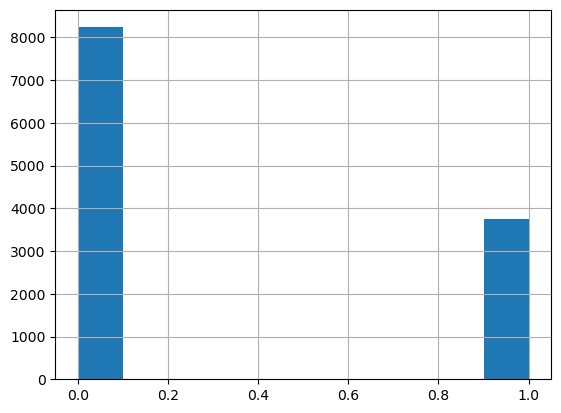

In [17]:
filtered_data_original.reward.hist()

In [18]:
reward_mean = filtered_data_original.reward.mean()
reward_mean

0.3134639433097124

In [19]:
# Reshuffling rows to randomise it
np.random.seed(100)
filtered_data = filtered_data_original.reindex(np.random.permutation(filtered_data_original.index)).reset_index(drop = True)

## LinUCB Disjoint Simulation

In [20]:
# Create class object for a single linear ucb disjoint arm
class linucb_disjoint_arm():
    
    def __init__(self, arm_index, d, alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = alpha
        
        # A: (d x d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # b: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
    def calc_UCB(self, x_array):
        # Find A inverse for ridge regression
        A_inv = np.linalg.inv(self.A)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta is (d x 1) dimension vector
        self.theta = np.dot(A_inv, self.b)
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta.T,x_array) +  self.alpha * np.sqrt(np.dot(x_array.T, np.dot(A_inv,x_array)))
        
        return p
    
    def reward_update(self, reward, x_array):
        # Update A which is (d * d) matrix.
        self.A += np.dot(x_array, x_array.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.b += reward * x_array

In [21]:
class linucb_disjoint_policy():
    
    def __init__(self, K_arms, d, alpha):
        self.K_arms = K_arms
        self.linucb_arms = [linucb_disjoint_arm(arm_index = i, d = d, alpha = alpha) for i in range(K_arms)]
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -1
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm
    
    def store_arm_index(self, arms_index_array):
    # Arms_features_array is multidimension array of shape (K_arms, 1+arm_dimensions), where 1 is for arm_index

        # Loop through all arms to store the individual arms
        for i in range(self.K_arms):

            self.linucb_arms[i].arm_index = arms_index_array[i]

In [22]:
def ctr_disjoint_simulator(K_arms, d, alpha, epochs, top_movies_index, steps_printout):
    start_time = time.time()
    # Initiate policy
    linucb_disjoint_policy_object = linucb_disjoint_policy(K_arms = K_arms, d = d, alpha = alpha)
    
    # Store specific arm_index
    linucb_disjoint_policy_object.store_arm_index(top_movies_index.to_numpy())
    
    # Instantiate trackers
    runtime =0
    aligned_time_steps = 0
    cumulative_rewards = 0
    aligned_ctr = []
    unaligned_ctr = [] # for unaligned time steps
    
    for epoch_iter in range(epochs):
        
        print("Epoch: " + str(epoch_iter))
        
        if epoch_iter == 0:
            # Start with filtered data first
            data = filtered_data.copy()
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        else:
            
            # Recycle unused data
            data = unused_data.copy().reset_index(drop = True)
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        
        for i in range(len(data)):

            user_id = data.loc[i,"user_id"]
            movie_id = data.loc[i, "movie_id"]

            # x_array: User features
            data_x_array = np.array(user_features.query("user_id == @user_id").drop("user_id", axis = 1)) # Shape (1 * 29), d = 29
            data_x_array = data_x_array.reshape(29,1)

            # Obtain rewards
            data_reward = data.loc[i, "reward"]

            if i%steps_printout == 0:
                print("step "+str(i))

            # Find policy's chosen arm based on input covariates at current time step
            chosen_arm_index = linucb_disjoint_policy_object.select_arm(data_x_array)

            # Check if arm_index is the same as data_arm (ie same actions were chosen)
            # Note that data_arms index range from 1 to 10 while policy arms index range from 0 to 9.
            if linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].arm_index  == movie_id:

                # Use reward information for the chosen arm to update
                linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].reward_update(data_reward, data_x_array)
                
                # For CTR calculation
                aligned_time_steps += 1
                cumulative_rewards += data_reward
                aligned_ctr.append(cumulative_rewards/aligned_time_steps)
            
            else:
                # Recycle data
                unused_data = pd.concat([unused_data, data.iloc[i:i+1]], ignore_index=True)
                    
    end_time = time.time()
    runtime = end_time - start_time
    print(runtime)
    return {"aligned_time_steps": aligned_time_steps, 
            "cumulative_rewards": cumulative_rewards, 
            "aligned_ctr":aligned_ctr, 
            "policy":linucb_disjoint_policy_object,
            "runtime": runtime}

# Compare Disjoint different α for a single simulation run

In [23]:
#α=0.1: Low exploration, high exploitation. Suitable for stable environments where the model needs to exploit known rewards.

simulation_disjoint_alpha_01 = ctr_disjoint_simulator(K_arms = n, 
                                                       d = 29,
                                                       alpha = 0.1, 
                                                       epochs = 2, 
                                                       top_movies_index = top_movies_index, 
                                                       steps_printout=5000)


Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
89.84411692619324


alpha = 0.1, alpha aligned_ctr_average:
0.486795873522389


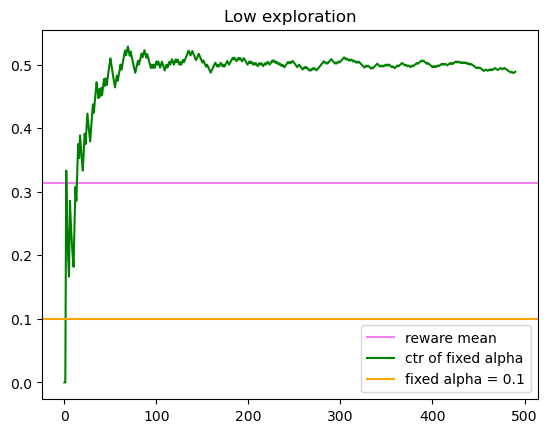

In [24]:
print("alpha = 0.1, alpha aligned_ctr_average:")
print(np.mean(simulation_disjoint_alpha_01["aligned_ctr"]))

plt.axhline(reward_mean, label="reware mean", color = "violet")
plt.plot(simulation_disjoint_alpha_01["aligned_ctr"], label="ctr of fixed alpha", color='green')
plt.axhline(y=0.1, label="fixed alpha = 0.1", color = "orange")
plt.title("Low exploration")
plt.legend()




In [25]:
# α=0.25: Balanced approach, commonly used as a baseline.
simulation_disjoint_alpha_025 = ctr_disjoint_simulator(K_arms = n, 
                                                       d = 29,
                                                       alpha = 0.25, 
                                                       epochs = 2, 
                                                       top_movies_index = top_movies_index, 
                                                       steps_printout=5000)


Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
99.63156080245972


alpha = 0.25, alpha aligned_ctr_average:
0.43099429855156296


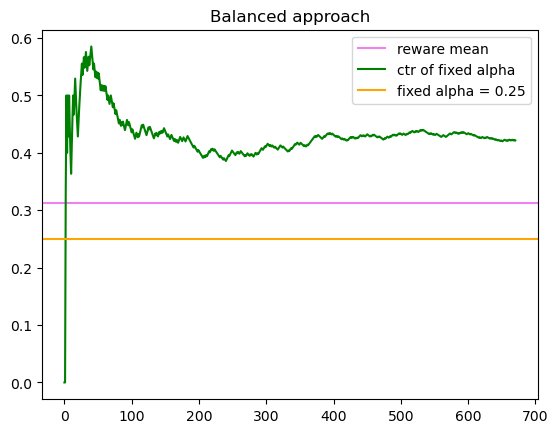

In [26]:
print("alpha = 0.25, alpha aligned_ctr_average:")
print(np.mean(simulation_disjoint_alpha_025["aligned_ctr"]))

plt.axhline(reward_mean, label="reware mean", color = "violet")
plt.plot(simulation_disjoint_alpha_025["aligned_ctr"], label="ctr of fixed alpha", color='green')
plt.axhline(y=0.25, label="fixed alpha = 0.25", color = "orange")
plt.title("Balanced approach")
plt.legend()



In [27]:
#α=0.5: Moderate exploration, useful when some exploration is necessary but not overly aggressive.
simulation_disjoint_alpha_05 = ctr_disjoint_simulator(K_arms = n, 
                                                       d = 29,
                                                       alpha = 0.5, 
                                                       epochs = 2, 
                                                       top_movies_index = top_movies_index, 
                                                       steps_printout=5000)



Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
103.02114510536194


alpha = 0.5, alpha aligned_ctr_average:
0.4343554028481818


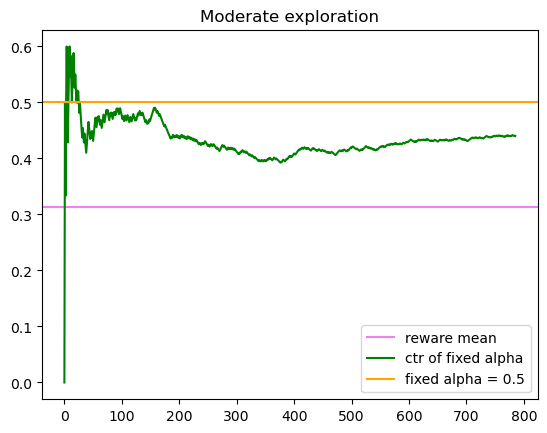

In [28]:
print("alpha = 0.5, alpha aligned_ctr_average:")
print(np.mean(simulation_disjoint_alpha_05["aligned_ctr"]))

plt.axhline(reward_mean, label="reware mean", color = "violet")
plt.plot(simulation_disjoint_alpha_05["aligned_ctr"], label="ctr of fixed alpha", color='green')
plt.axhline(0.5, label="fixed alpha = 0.5", color = "orange")
plt.title("Moderate exploration")
plt.legend()

In [29]:
#α=1: High exploration, suitable for more volatile environments where the algorithm needs to explore more.
simulation_disjoint_alpha_1 = ctr_disjoint_simulator(K_arms = n, 
                                                       d = 29,
                                                       alpha = 1, 
                                                       epochs = 2, 
                                                       top_movies_index = top_movies_index, 
                                                       steps_printout=5000)


Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
98.24534201622009


alpha = 1, alpha aligned_ctr_average:
0.36996329485723944


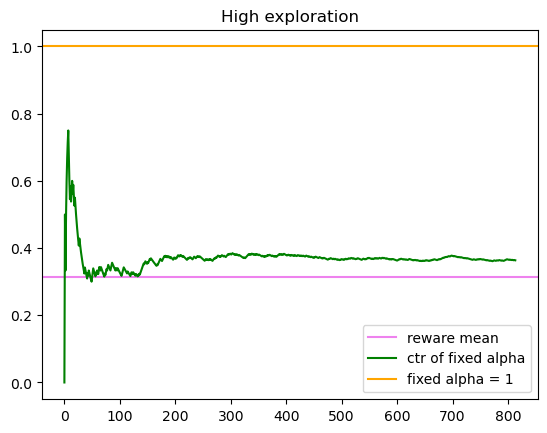

In [30]:
print("alpha = 1, alpha aligned_ctr_average:")
print(np.mean(simulation_disjoint_alpha_1["aligned_ctr"]))

plt.axhline(reward_mean, label="reware mean", color = "violet")
plt.plot(simulation_disjoint_alpha_1["aligned_ctr"], label="ctr of fixed alpha", color='green')
plt.axhline(1, label="fixed alpha = 1", color = "orange")
plt.title("High exploration")
plt.legend()


In [31]:
# α=2: Very high exploration, used in highly uncertain environments or early in the learning process.
simulation_disjoint_alpha_2 = ctr_disjoint_simulator(K_arms = n, 
                                                       d = 29,
                                                       alpha = 2, 
                                                       epochs = 2, 
                                                       top_movies_index = top_movies_index, 
                                                       steps_printout=5000)


Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
110.08781123161316


alpha = 2, alpha aligned_ctr_average:
0.36585538626367314


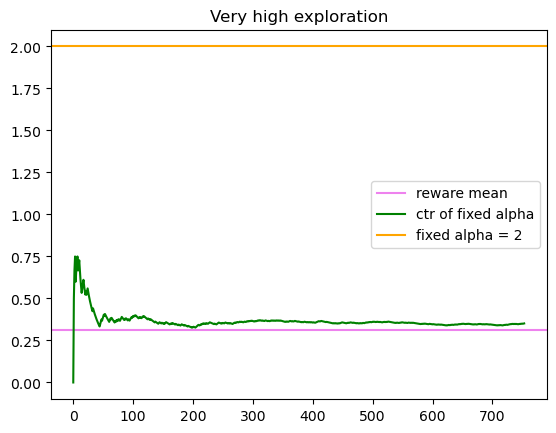

In [32]:
print("alpha = 2, alpha aligned_ctr_average:")
print(np.mean(simulation_disjoint_alpha_2["aligned_ctr"]))


plt.axhline(reward_mean, label="reware mean", color = "violet")
plt.plot(simulation_disjoint_alpha_2["aligned_ctr"], label="ctr of fixed alpha", color='green')
plt.axhline(2, label="fixed alpha = 2", color = "orange")
plt.title("Very high exploration")
plt.legend()


# LinUCB Disjoint dynamic α Simulation

In [33]:
class linucb_disjoint_adjust_alpha_arm():
    
    def __init__(self, arm_index, d, initial_alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = initial_alpha
        
        # A: (d x d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # b: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
    def calc_UCB(self, x_array):
        # Find A inverse for ridge regression
        A_inv = np.linalg.inv(self.A)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta is (d x 1) dimension vector
        self.theta = np.dot(A_inv, self.b)
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta.T,x_array) +  self.alpha * np.sqrt(np.dot(x_array.T, np.dot(A_inv,x_array)))
        
        return p
    
    def reward_update(self, reward, x_array):
        # Update A which is (d * d) matrix.
        self.A += np.dot(x_array, x_array.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.b += reward * x_array


In [34]:
class linucb_disjoint_adjust_alpha_policy():
    
    def __init__(self, K_arms, d, initial_alpha):
        self.K_arms = K_arms
        self.initial_alpha = initial_alpha
        self.linucb_arms = [linucb_disjoint_adjust_alpha_arm(arm_index = i, d = d, initial_alpha = initial_alpha) for i in range(K_arms)]
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -1
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm
    
    def store_arm_index(self, arms_index_array):
    # Arms_features_array is multidimension array of shape (K_arms, 1+arm_dimensions), where 1 is for arm_index

        # Loop through all arms to store the individual arms
        for i in range(self.K_arms):

            self.linucb_arms[i].arm_index = arms_index_array[i]

In [35]:
def linucb_disjoint_adjust_alpha_simulator(K_arms, d, initial_alpha, epochs, top_movies_index, steps_printout, evaluation_interval):
    start_time = time.time()
    # Initiate policy
    linucb_disjoint_policy_object = linucb_disjoint_adjust_alpha_policy(K_arms=K_arms, d=d, initial_alpha=initial_alpha)
    
    # Store specific arm_index
    linucb_disjoint_policy_object.store_arm_index(top_movies_index.to_numpy())
    
    # Instantiate trackers
    aligned_time_steps = 0
    cumulative_rewards = 0
    runtime = 0
    aligned_ctr = []
    alpha_history = [initial_alpha]
    previous_ctr = 0  # Initialize previous CTR for comparison
    
    for epoch_iter in range(epochs):
        print("Epoch:", epoch_iter)
        #print(alpha_history)
        
        if epoch_iter == 0:
            # Start with filtered data first
            data = filtered_data.copy()
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns=["user_id", "movie_id", "rating", "reward"])
        else:
            # Recycle unused data
            data = unused_data.copy().reset_index(drop=True)
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns=["user_id", "movie_id", "rating", "reward"])
        
        for i in range(len(data)):
            user_id = data.loc[i, "user_id"]
            movie_id = data.loc[i, "movie_id"]

            # x_array: User features
            data_x_array = np.array(user_features.query("user_id == @user_id").drop("user_id", axis=1))
            data_x_array = data_x_array.reshape(d, 1)

            # Obtain rewards
            data_reward = data.loc[i, "reward"]

            if i % steps_printout == 0:
                print("Step:", i)

            # Find policy's chosen arm based on input covariates at current time step
            chosen_arm_index = linucb_disjoint_policy_object.select_arm(data_x_array)

            # Check if arm_index is the same as data_arm
            if linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].arm_index == movie_id:
                # Use reward information for the chosen arm to update
                linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].reward_update(data_reward, data_x_array)

                # For CTR calculation
                aligned_time_steps += 1
                cumulative_rewards += data_reward
                aligned_ctr.append(cumulative_rewards / aligned_time_steps)
            else:
                # Recycle data
                unused_data = pd.concat([unused_data, data.iloc[i:i+1]], ignore_index=True)
        
            # Adjust alpha after each data point processed
            if i % evaluation_interval == 0:
                # Calculate current CTR
                if aligned_time_steps > 0:
                    current_ctr = cumulative_rewards / aligned_time_steps
                else:
                    current_ctr = 0  # Handle the case where no data points are aligned

                #print(f"Evaluating alpha adjustment: current CTR={current_ctr}, previous CTR={previous_ctr}")

                # Update alpha based on performance evaluation
                if current_ctr > previous_ctr:
                    # If current performance is improving, decrease alpha，reduce exploration
                    new_alpha = max(0.05, alpha_history[-1] *0.95)
                elif current_ctr < previous_ctr:
                    # If current performance is not improving, increase alpha slightly，increase exploration
                    new_alpha = min(2.5, alpha_history[-1] *1.05)
                    
                else:
                    # If current performance is stable, keep alpha the same
                    new_alpha = alpha_history[-1]

                # Update alpha in the policy object
                for arm in linucb_disjoint_policy_object.linucb_arms:
                    arm.alpha = new_alpha
                
                # Append new alpha to history
                alpha_history.append(new_alpha)
                #print("Updated alpha:", new_alpha)
                #print("alpha_history:", alpha_history)
                
                # Update previous CTR
                previous_ctr = current_ctr
                
    end_time = time.time()
    runtime = end_time - start_time
    print(runtime)                
    return {
        "aligned_time_steps": aligned_time_steps, 
        "cumulative_rewards": cumulative_rewards, 
        "aligned_ctr": aligned_ctr,
        "alpha_history": alpha_history,
        "policy": linucb_disjoint_policy_object,
        "runtime": runtime
    }

In [36]:
# Compare Disjoint vs dynamic α (initial alpha = 0.1) for a single simulation run
simulation_disjoint_adjust_alpha_01 = linucb_disjoint_adjust_alpha_simulator(K_arms=n, 
                                                                       d=29,
                                                                       initial_alpha=0.1, 
                                                                       epochs=2, 
                                                                       top_movies_index=top_movies_index, 
                                                                       steps_printout=5000,
                                                                       evaluation_interval=1000)

print("alpha = 0.1 history:", simulation_disjoint_adjust_alpha_01["alpha_history"])
print("runtime:", simulation_disjoint_adjust_alpha_01["runtime"])

Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
100.72299909591675
alpha = 0.1 history: [0.1, 0.1, 0.095, 0.09025, 0.0857375, 0.08145062499999998, 0.07737809374999999, 0.0812469984375, 0.077184648515625, 0.07332541608984375, 0.06965914528535155, 0.07314210254961913, 0.07679920767710009, 0.07295924729324509, 0.06931128492858282, 0.07277684917501197, 0.06913800671626137, 0.07259490705207444, 0.06896516169947071, 0.06551690361449718, 0.06224105843377231, 0.06535311135546093, 0.06208545578768788, 0.05898118299830348, 0.05603212384838831]
runtime: 100.72299909591675


In [37]:
# Plot aligned_ctr and alpha_history on the same y-axis
def plot_ctr_alpha_history(aligned_ctr, alpha_history, reward_mean, initial_alpha, title):
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot aligned CTR
    ax.axhline(reward_mean, label="Reward Mean", color="violet")
    ax.plot(aligned_ctr, label="CTR of Dynamic Alpha", color='blue')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('CTR and Alpha', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    # Plot alpha history
    alpha_points = len(alpha_history)
    max_index = len(aligned_ctr)
    interp_indices = np.linspace(0, max_index - 1, alpha_points).astype(int)
    ax.plot(interp_indices, alpha_history, label="Alpha History", color='red', linestyle='dashed')

    # Add scatter points and annotations to alpha history
    for i, alpha in enumerate(alpha_history):
        interval_index = interp_indices[i]
        y_value = alpha_history[i]
        ax.scatter(interval_index, y_value, color='red')  # Add scatter point
        ax.annotate(f'{alpha:.3f}', (interval_index, y_value),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    fig.tight_layout()
    fig.suptitle(f"{title}: Aligned CTR and Alpha History - initial α = {initial_alpha:.2f}", y=1.05)
    plt.legend()
    plt.show()
    

dynamic α = 0.1, aligned_ctr_average:
0.41791300354975003


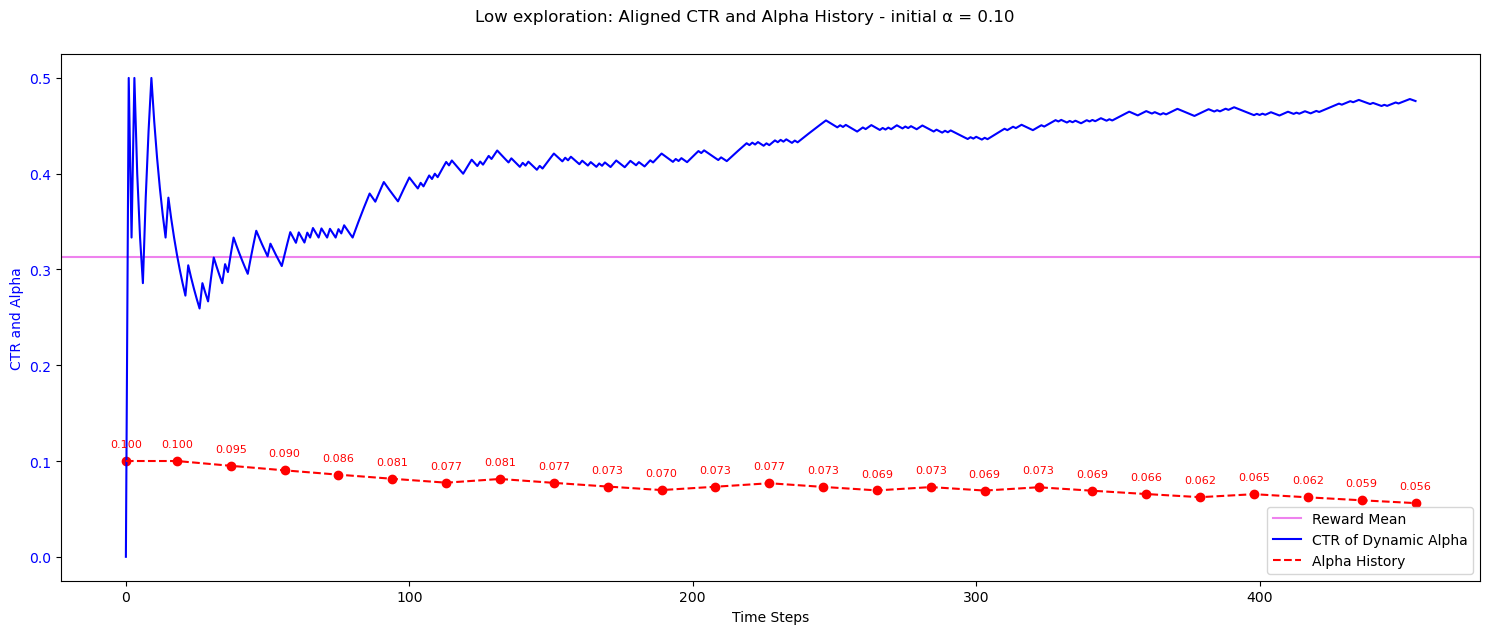

In [38]:
# plot dynamic α = 0.1
print("dynamic α = 0.1, aligned_ctr_average:")
print(np.mean(simulation_disjoint_adjust_alpha_01["aligned_ctr"]))

result_disjoint_adjust_alpha_01 = plot_ctr_alpha_history(simulation_disjoint_adjust_alpha_01["aligned_ctr"], 
                                                         simulation_disjoint_adjust_alpha_01["alpha_history"],
                                                         reward_mean = reward_mean, 
                                                         initial_alpha = 0.1, 
                                                         title = "Low exploration")

In [39]:
# Plot aligned_ctr and alpha_history on the same y-axis
def plot_compare_fixed_dynamic_alpha(aligned_ctr, alpha_history, reward_mean, initial_alpha, title, fix_alpha_simulation_results):
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot aligned CTR
    ax.axhline(reward_mean, label="Reward Mean", color="violet")
    ax.axhline(initial_alpha, label=f'LinUCB Disjoint α={initial_alpha}', color="orange")
    ax.plot(fix_alpha_simulation_results["aligned_ctr"], label="CTR of LinUCB Disjoint", color='green')
    ax.plot(aligned_ctr, label="CTR of Dynamic Alpha", color='blue')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('CTR and Alpha', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    # Plot alpha history
    alpha_points = len(alpha_history)
    max_index = len(aligned_ctr)
    interp_indices = np.linspace(0, max_index - 1, alpha_points).astype(int)
    ax.plot(interp_indices, alpha_history, label="Alpha History", color='red', linestyle='dashed')

    # Add scatter points and annotations to alpha history
    for i, alpha in enumerate(alpha_history):
        interval_index = interp_indices[i]
        y_value = alpha_history[i]
        ax.scatter(interval_index, y_value, color='red')  # Add scatter point
        ax.annotate(f'{alpha:.3f}', (interval_index, y_value),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    fig.tight_layout()
    fig.suptitle(f"{title}: Aligned CTR and Alpha History - initial α = {initial_alpha:.2f}", y=1.05)
    plt.legend()
    plt.show()
    

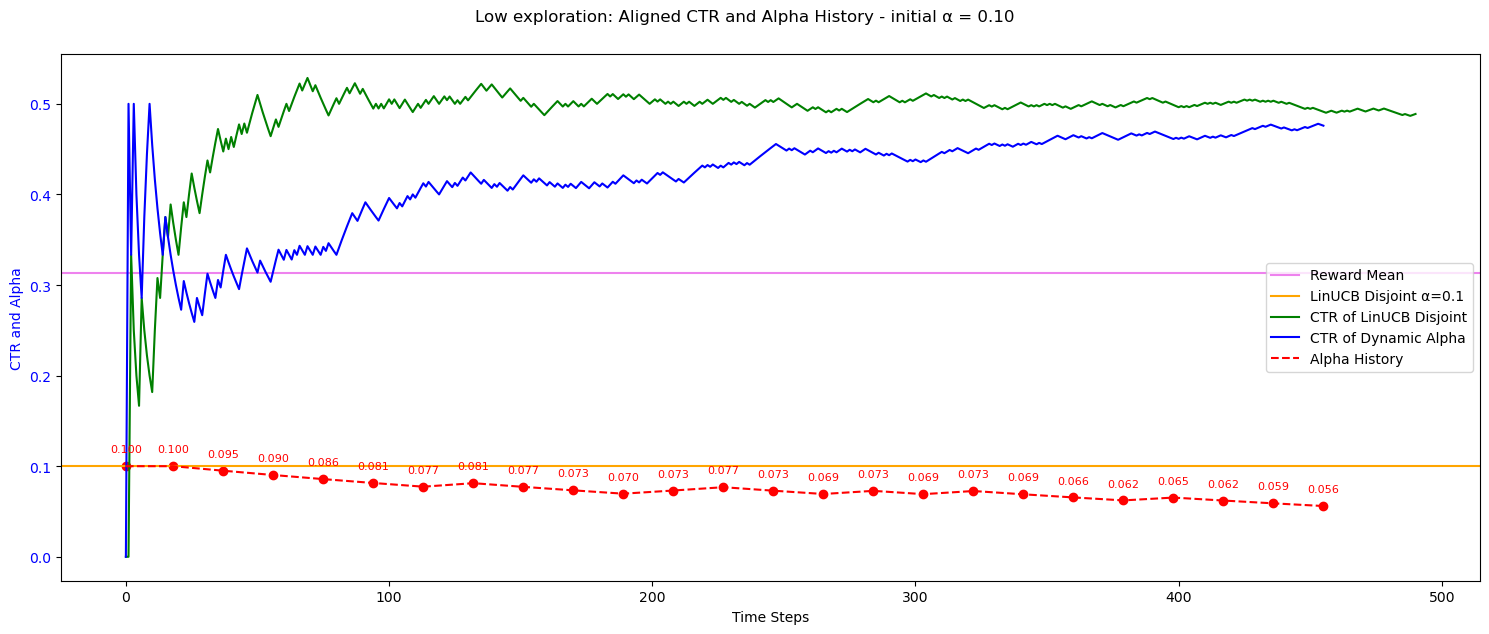

In [40]:
# fix and dynamic α = 0.1 comparison
result_compare_disjoint_adjust_alpha_01 = plot_compare_fixed_dynamic_alpha(simulation_disjoint_adjust_alpha_01["aligned_ctr"],
                                                                            simulation_disjoint_adjust_alpha_01["alpha_history"],
                                                                            reward_mean = reward_mean,
                                                                            initial_alpha = 0.1, 
                                                                            title = "Low exploration", 
                                                                            fix_alpha_simulation_results = simulation_disjoint_alpha_01)

In [41]:
# simulation dynamic α = 0.25 
simulation_disjoint_adjust_alpha_025 = linucb_disjoint_adjust_alpha_simulator(K_arms=n, 
                                                                       d=29,
                                                                       initial_alpha=0.25, 
                                                                       epochs=2, 
                                                                       top_movies_index=top_movies_index, 
                                                                       steps_printout=5000,
                                                                       evaluation_interval=1000)

print("alpha = 0.25 history:", simulation_disjoint_adjust_alpha_025["alpha_history"])
print("runtime:", simulation_disjoint_adjust_alpha_025["runtime"])

Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
108.42914509773254
alpha = 0.25 history: [0.25, 0.25, 0.2375, 0.225625, 0.21434374999999997, 0.22506093749999997, 0.23631398437499998, 0.24812968359374998, 0.23572319941406247, 0.22393703944335933, 0.2351338914155273, 0.2233771968447509, 0.21220833700251335, 0.22281875385263902, 0.21167781616000705, 0.22226170696800743, 0.23337479231640781, 0.24504353193222822, 0.25729570852883965, 0.27016049395528163, 0.25665246925751756, 0.26948509272039345, 0.25601083808437375, 0.26881137998859245, 0.2553708109891628]
runtime: 108.42914509773254


dynamic α = 0.25, aligned_ctr_average:
0.4725485747680511


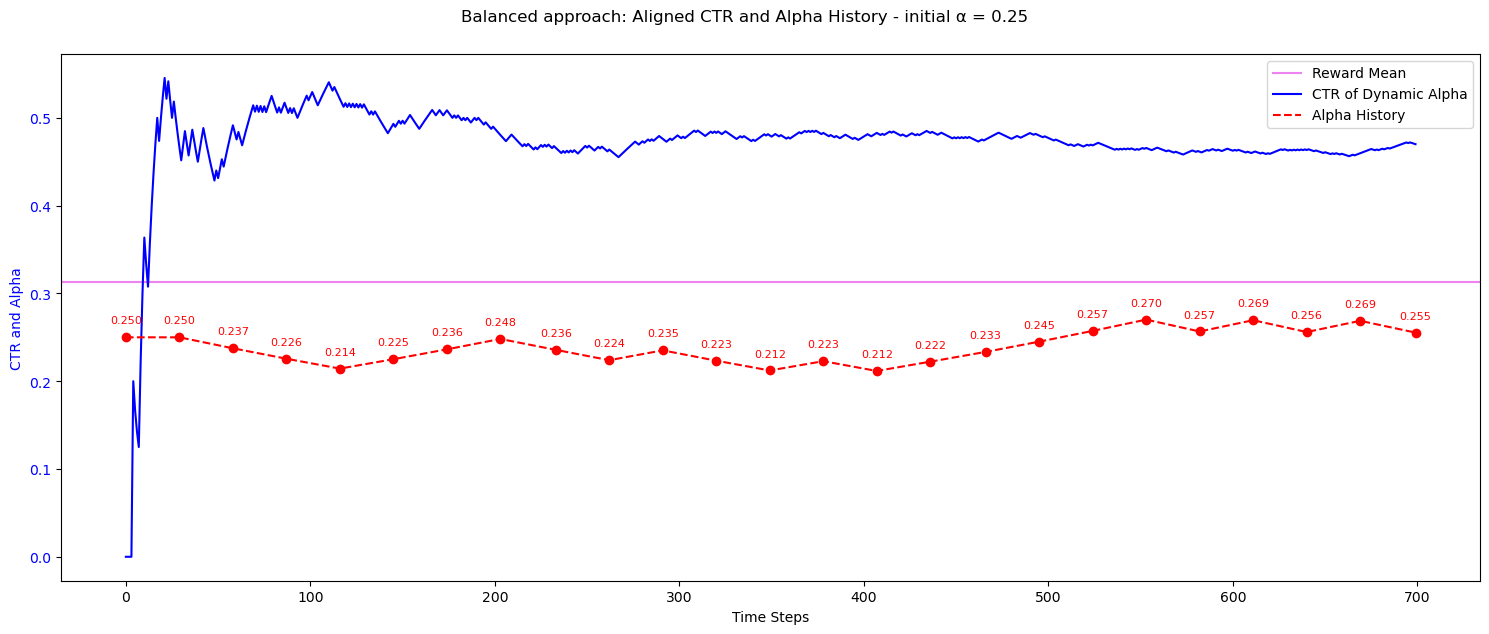

In [42]:
# plot dynamic α = 0.25 
print("dynamic α = 0.25, aligned_ctr_average:")
print(np.mean(simulation_disjoint_adjust_alpha_025["aligned_ctr"]))

result_disjoint_adjust_alpha_025 = plot_ctr_alpha_history(simulation_disjoint_adjust_alpha_025["aligned_ctr"], 
                                                          simulation_disjoint_adjust_alpha_025["alpha_history"],
                                                          reward_mean = reward_mean, 
                                                          initial_alpha = 0.25, 
                                                          title = "Balanced approach")

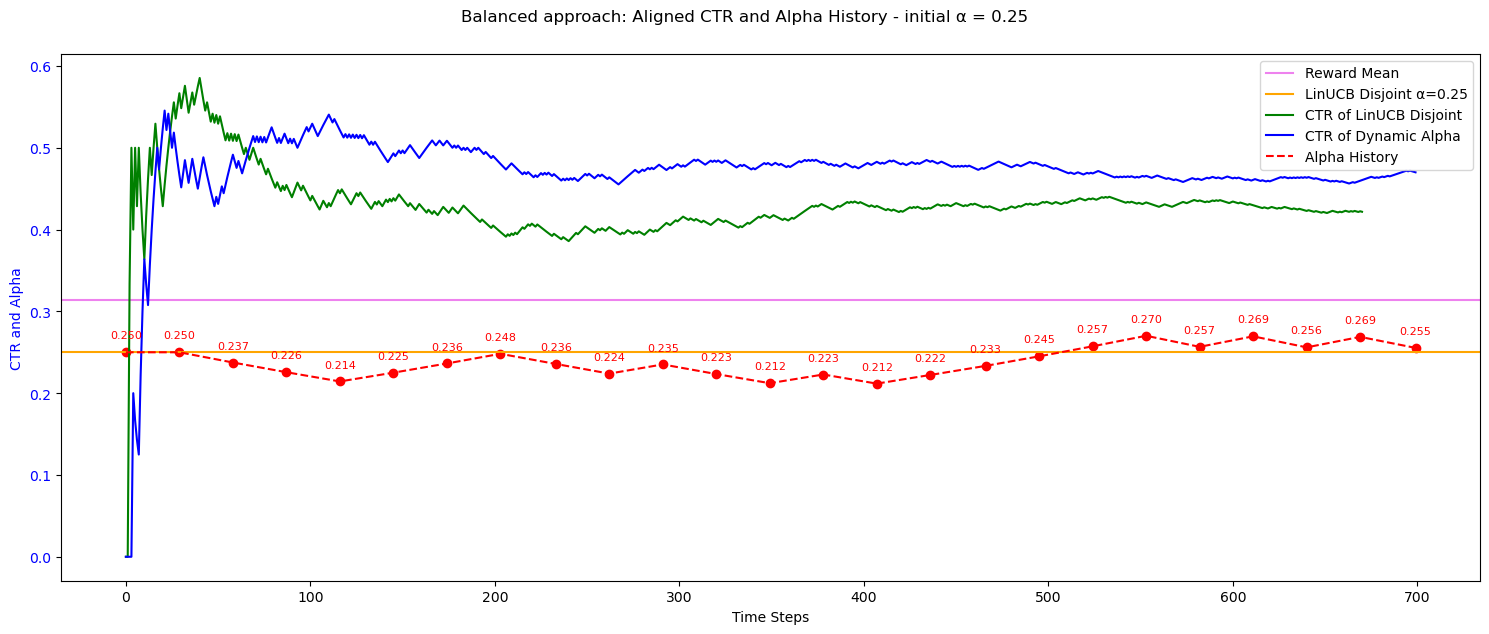

In [43]:
# fix and dynamic α = 0.25 comparison
result_compare_disjoint_adjust_alpha_025 = plot_compare_fixed_dynamic_alpha(simulation_disjoint_adjust_alpha_025["aligned_ctr"],
                                                                            simulation_disjoint_adjust_alpha_025["alpha_history"],
                                                                            reward_mean = reward_mean,
                                                                            initial_alpha = 0.25, 
                                                                            title = "Balanced approach", 
                                                                            fix_alpha_simulation_results = simulation_disjoint_alpha_025)

In [44]:
# simulation dynamic α = 0.5 
simulation_disjoint_adjust_alpha_05 = linucb_disjoint_adjust_alpha_simulator(K_arms=n, 
                                                                       d=29,
                                                                       initial_alpha=0.5, 
                                                                       epochs=2, 
                                                                       top_movies_index=top_movies_index, 
                                                                       steps_printout=5000,
                                                                       evaluation_interval=1000)

print("alpha = 0.5 history:", simulation_disjoint_adjust_alpha_05["alpha_history"])
print("runtime:", simulation_disjoint_adjust_alpha_05["runtime"])

Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
112.09948396682739
alpha = 0.5 history: [0.5, 0.5, 0.475, 0.45125, 0.4738125, 0.450121875, 0.47262796875, 0.4962593671875, 0.521072335546875, 0.5471259523242188, 0.5197696547080078, 0.4937811719726074, 0.5184702305712378, 0.5443937420997996, 0.5716134292047896, 0.6001941006650291, 0.6302038056982806, 0.5986936154133665, 0.5687589346426982, 0.5971968813748332, 0.5673370373060915, 0.5957038891713962, 0.5659186947128263, 0.537622759977185, 0.5645038979760443]
runtime: 112.09948396682739


dynamic α = 0.5, aligned_ctr_average:
0.3968998429528961


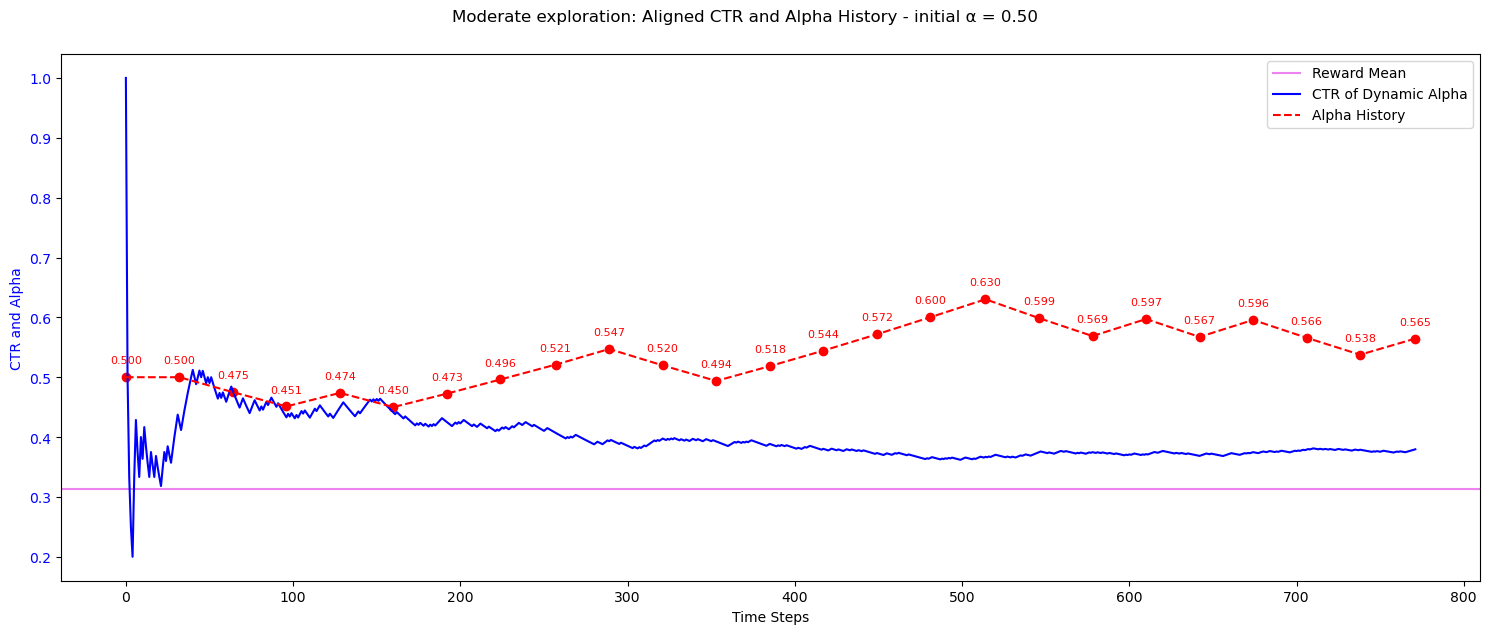

In [45]:
# plot dynamic α = 0.5
print("dynamic α = 0.5, aligned_ctr_average:")
print(np.mean(simulation_disjoint_adjust_alpha_05["aligned_ctr"]))

result_disjoint_adjust_alpha_05 = plot_ctr_alpha_history(simulation_disjoint_adjust_alpha_05["aligned_ctr"], 
                                                          simulation_disjoint_adjust_alpha_05["alpha_history"],
                                                          reward_mean = reward_mean, 
                                                          initial_alpha = 0.5, 
                                                          title = "Moderate exploration")

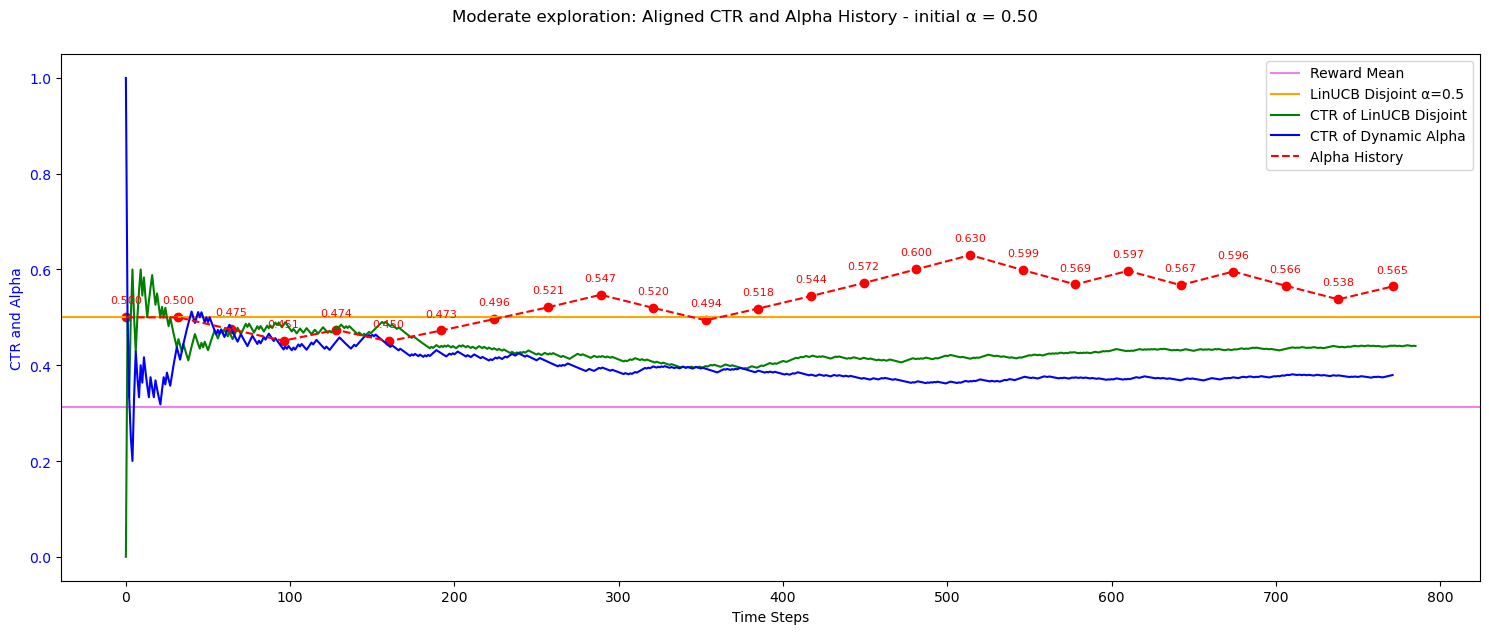

In [46]:
# fix and dynamic α = 0.5 comparison
result_compare_disjoint_adjust_alpha_05 = plot_compare_fixed_dynamic_alpha(simulation_disjoint_adjust_alpha_05["aligned_ctr"],
                                                                           simulation_disjoint_adjust_alpha_05["alpha_history"],
                                                                           reward_mean = reward_mean,
                                                                           initial_alpha = 0.5,
                                                                           title = "Moderate exploration",
                                                                           fix_alpha_simulation_results = simulation_disjoint_alpha_05)

In [47]:
# simulation dynamic α = 1 
simulation_disjoint_adjust_alpha_1 = linucb_disjoint_adjust_alpha_simulator(K_arms=n, 
                                                                       d=29,
                                                                       initial_alpha=1, 
                                                                       epochs=2, 
                                                                       top_movies_index=top_movies_index, 
                                                                       steps_printout=5000,
                                                                       evaluation_interval=1000)

print("alpha = 1 history:", simulation_disjoint_adjust_alpha_1["alpha_history"])
print("runtime:", simulation_disjoint_adjust_alpha_1["runtime"])

Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
96.91513872146606
alpha = 1 history: [1, 1, 0.95, 0.9025, 0.8573749999999999, 0.8145062499999999, 0.8552315624999999, 0.8124699843749998, 0.7718464851562498, 0.7332541608984372, 0.6965914528535153, 0.6617618802108395, 0.6286737862002975, 0.5972400968902826, 0.5673780920457684, 0.5957469966480569, 0.565959646815654, 0.5942576291564368, 0.5645447476986148, 0.5927719850835456, 0.6224105843377229, 0.653531113554609, 0.6862076692323396, 0.7205180526939565, 0.7565439553286544]
runtime: 96.91513872146606


dynamic α = 1, aligned_ctr_average:
0.3658028050579348


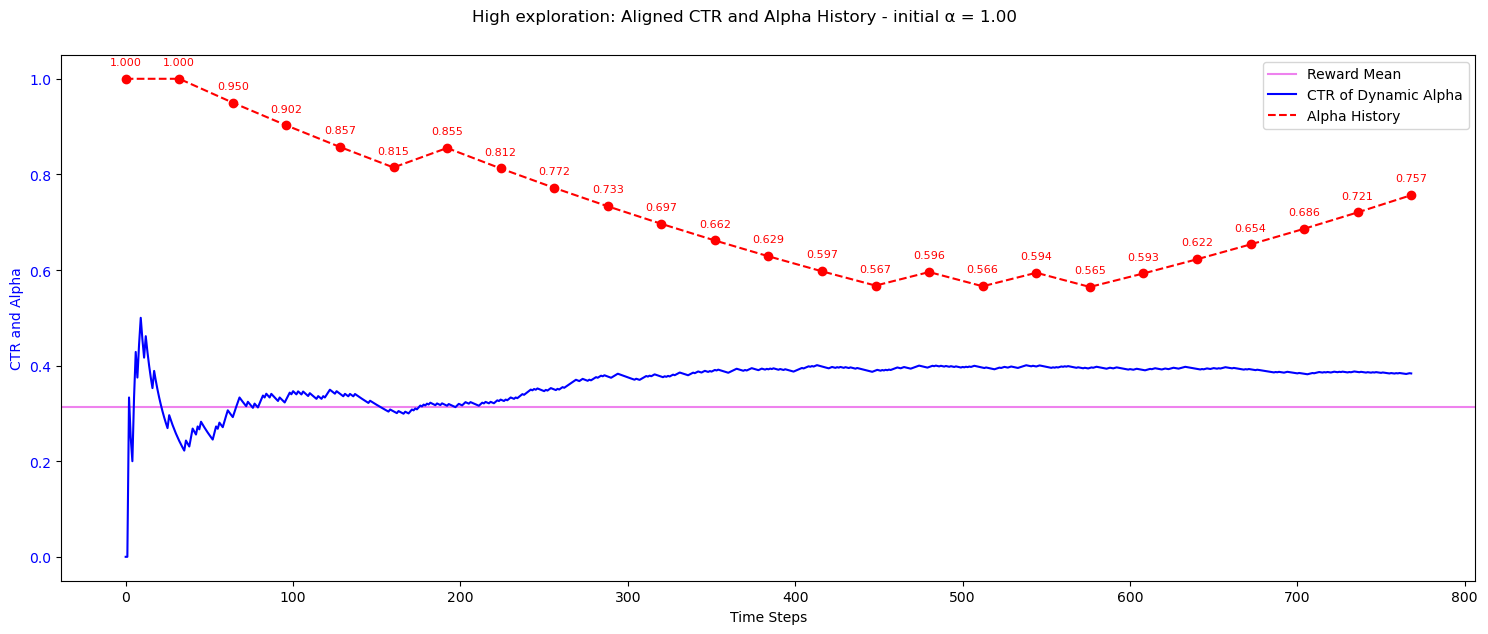

In [48]:
# plot dynamic α = 1
print("dynamic α = 1, aligned_ctr_average:")
print(np.mean(simulation_disjoint_adjust_alpha_1["aligned_ctr"]))

result_disjoint_adjust_alpha_1 = plot_ctr_alpha_history(simulation_disjoint_adjust_alpha_1["aligned_ctr"], 
                                                          simulation_disjoint_adjust_alpha_1["alpha_history"],
                                                          reward_mean = reward_mean, 
                                                          initial_alpha = 1, 
                                                          title = "High exploration")

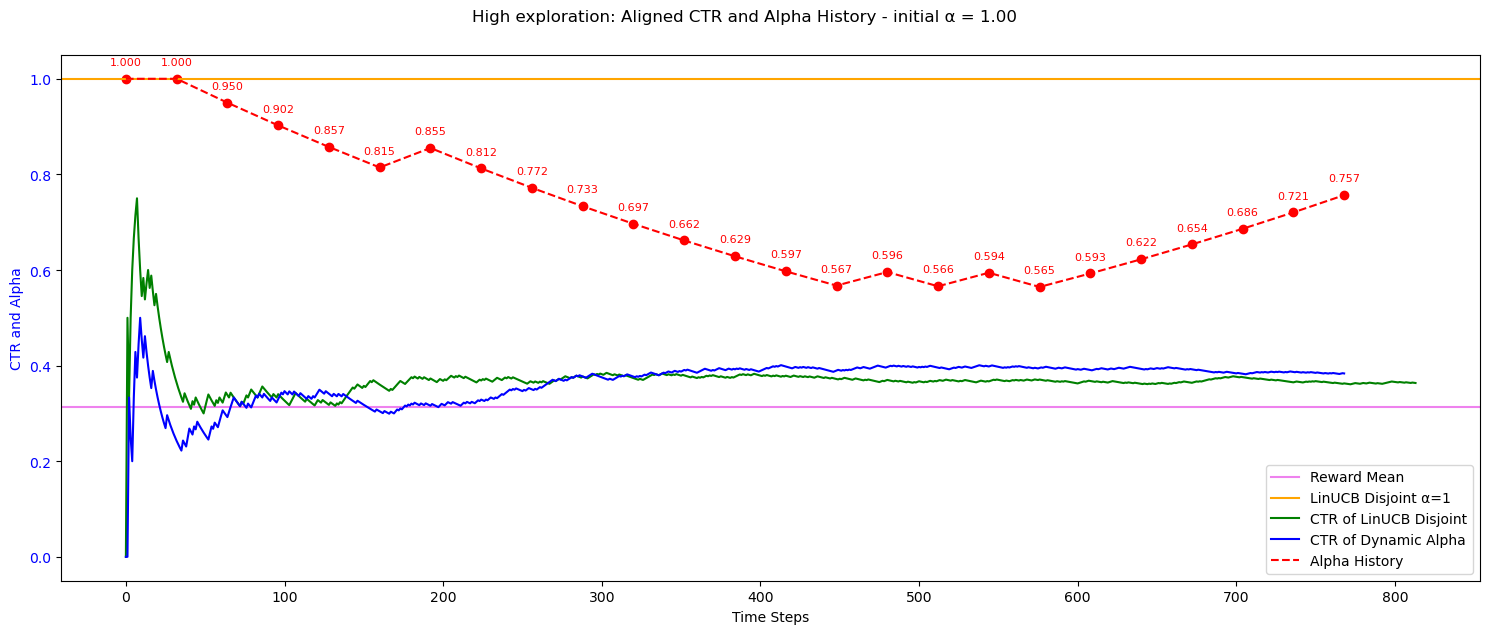

In [49]:
# fix and dynamic α = 1 comparison
result_compare_disjoint_adjust_alpha_1 = plot_compare_fixed_dynamic_alpha(simulation_disjoint_adjust_alpha_1["aligned_ctr"],
                                                                          simulation_disjoint_adjust_alpha_1["alpha_history"],
                                                                          reward_mean = reward_mean,
                                                                          initial_alpha = 1, 
                                                                          title = "High exploration", 
                                                                          fix_alpha_simulation_results = simulation_disjoint_alpha_1)

In [50]:
# simulation dynamic α = 2
simulation_disjoint_adjust_alpha_2 = linucb_disjoint_adjust_alpha_simulator(K_arms=n, 
                                                                       d=29,
                                                                       initial_alpha=2, 
                                                                       epochs=2, 
                                                                       top_movies_index=top_movies_index, 
                                                                       steps_printout=5000,
                                                                       evaluation_interval=1000)

print("alpha = 2 history:", simulation_disjoint_adjust_alpha_2["alpha_history"])
print("runtime:", simulation_disjoint_adjust_alpha_2["runtime"])

Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
95.15210604667664
alpha = 2 history: [2, 2, 1.9, 1.9949999999999999, 2.09475, 2.1994875, 2.089513125, 2.19398878125, 2.3036882203125, 2.4188726313281252, 2.5, 2.5, 2.375, 2.25625, 2.1434375, 2.036265625, 1.9344523437499999, 2.0311749609375, 1.9296162128906247, 1.8331354022460933, 1.7414786321337885, 1.654404700527099, 1.571684465500744, 1.6502686887757814, 1.5677552543369921]
runtime: 95.15210604667664


dynamic α = 2, aligned_ctr_average:
0.3663627376397211


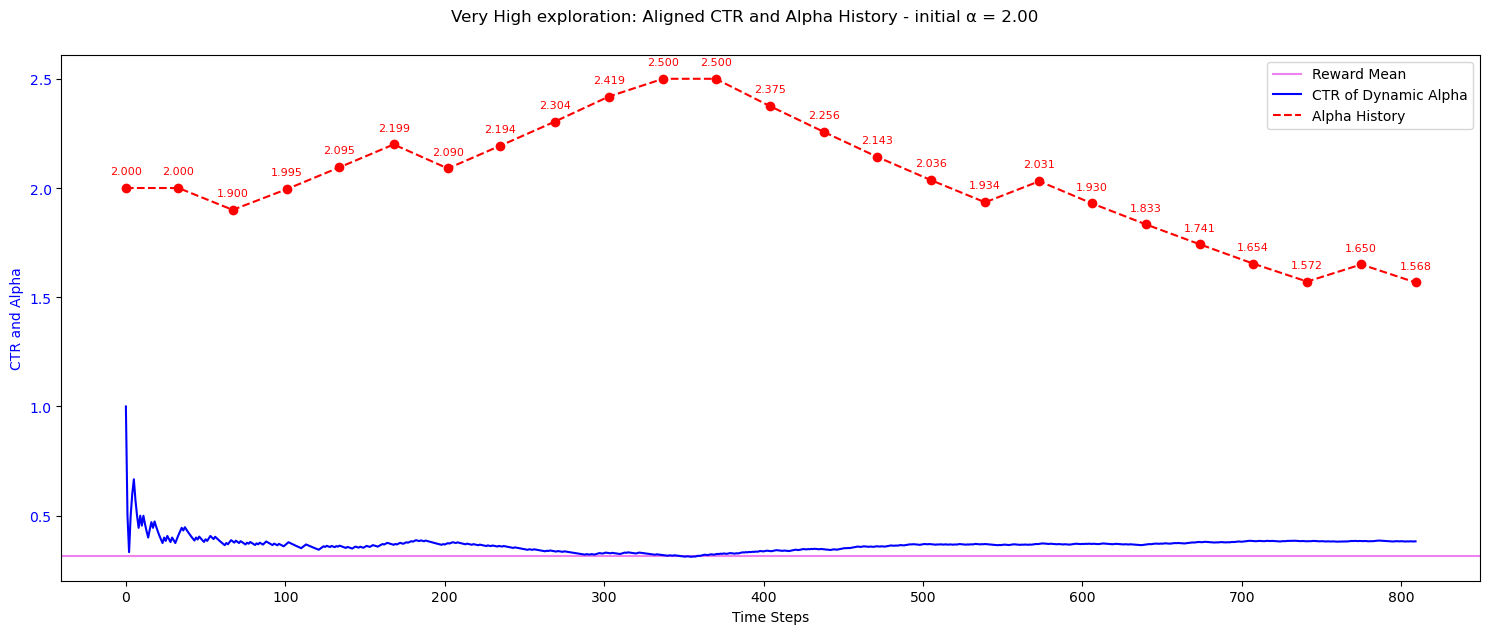

In [51]:
# plot dynamic α = 2
print("dynamic α = 2, aligned_ctr_average:")
print(np.mean(simulation_disjoint_adjust_alpha_2["aligned_ctr"]))

result_disjoint_adjust_alpha_2 = plot_ctr_alpha_history(simulation_disjoint_adjust_alpha_2["aligned_ctr"], 
                                                        simulation_disjoint_adjust_alpha_2["alpha_history"],
                                                        reward_mean = reward_mean, 
                                                        initial_alpha = 2, 
                                                        title = "Very High exploration")

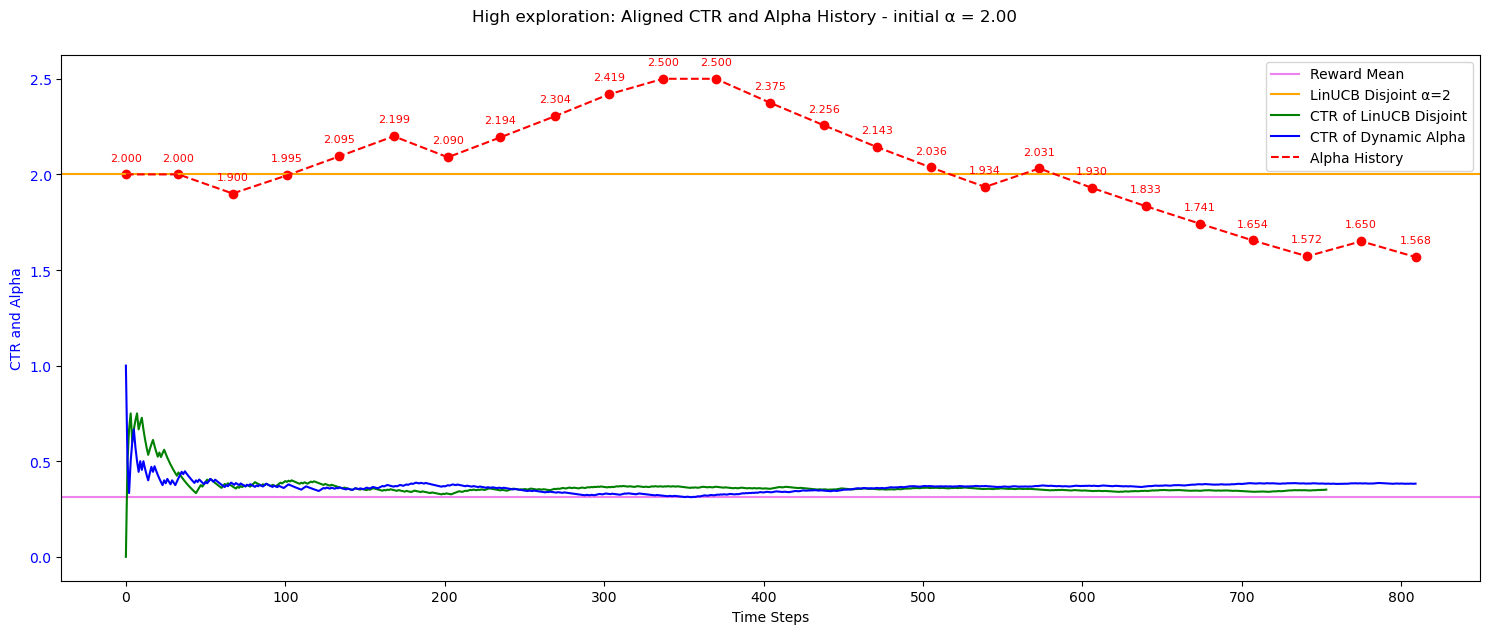

In [52]:
# fix and dynamic α = 2 comparison
result_compare_disjoint_adjust_alpha_2 = plot_compare_fixed_dynamic_alpha(simulation_disjoint_adjust_alpha_2["aligned_ctr"],
                                                                          simulation_disjoint_adjust_alpha_2["alpha_history"],
                                                                          reward_mean = reward_mean,
                                                                          initial_alpha = 2, 
                                                                          title = "High exploration", 
                                                                          fix_alpha_simulation_results = simulation_disjoint_alpha_2)